In [1]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
X = 0

In [3]:
def confronta(s, pos, Sequence):
  global X
  sequenceMin = []
  sequenceMax = []
  for i in range(len(Sequence)):
    if(i != pos):
      if Sequence[i] < s:
        sequenceMin.append(Sequence[i])
        X += 1
      else:
        sequenceMax.append(Sequence[i])
        X += 1
  return [sequenceMin, sequenceMax]

In [4]:
def LVQuickSort(Sequence):
  if(len(Sequence) <= 1): return Sequence
  pos = random.randint(0, len(Sequence)-1)
  s = Sequence[pos]
  confronto = confronta(s, pos, Sequence)
  sequenceMin = LVQuickSort(confronto[0])
  sequenceMax = LVQuickSort(confronto[1])

  return np.concatenate([sequenceMin, [s], sequenceMax])

In [5]:
n = 10**4
R = 10**5
Xr = []
array = np.random.randint(0, n, size=n)

In [6]:
for i in tqdm(range(R)):
  X = 0
  LVQuickSort(array)
  Xr.append(X)


100%|██████████| 100000/100000 [48:58<00:00, 34.03it/s] 


In [8]:
print(Xr)

[144370, 152463, 154489, 149348, 160214, 148767, 147895, 154252, 161382, 165145, 158988, 146913, 181892, 150559, 148563, 144679, 166628, 148272, 154027, 159764, 149953, 148773, 156839, 163948, 161496, 150622, 164412, 147119, 151874, 163627, 157257, 157824, 156769, 153561, 162753, 145186, 160242, 148912, 151163, 150913, 156695, 155861, 148334, 163926, 169340, 154665, 166586, 153160, 161833, 153217, 174638, 162564, 162283, 148516, 145872, 163668, 149090, 158447, 165348, 149636, 155189, 160606, 156642, 145451, 153972, 154086, 156899, 159380, 156244, 145173, 146822, 150950, 147469, 152476, 152829, 157775, 154320, 152572, 154796, 156321, 157514, 147733, 157509, 158441, 152409, 151411, 152515, 151533, 150926, 157209, 149470, 146124, 149832, 158015, 145802, 151913, 157012, 159859, 161391, 149162, 150112, 159866, 146487, 147245, 157363, 155668, 165253, 148139, 164087, 173612, 153997, 160829, 148426, 154728, 155684, 156451, 165743, 154817, 154244, 181709, 166386, 157405, 154609, 156737, 162555,

In [7]:
def valore_medio(R,Xr):
  sommatoria = sum(Xr)
  return (1/R) * sommatoria

In [9]:
def varianza(R,Xr,u):
  sommatoria = 0
  for i in Xr:
    sommatoria += ((i-u)**2)
  return (1/(R-1)) * sommatoria

In [10]:
val_medio = valore_medio(R,Xr)
varianza = varianza(R,Xr,val_medio)
dev_standard = math.sqrt(varianza)

In [11]:
def conta_frequenze(Xr, n, val_medio):
    k = 0
    for x in Xr:
        if x >= n*val_medio:
            k += 1
    return k

In [12]:
print("Frequenza empirica di X per il doppio: ", conta_frequenze(Xr, 2, val_medio)/R)

Frequenza empirica di X per il doppio:  0.0


In [13]:
print("Frequenza empirica di X per il triplo: ", conta_frequenze(Xr, 3, val_medio)/R)

Frequenza empirica di X per il triplo:  0.0


In [14]:
print("Valore medio: ", val_medio)
print("Varianza: ", varianza)
print("Deviazione standard: ", dev_standard)

Valore medio:  156010.66507000002
Varianza:  41559494.55715764
Deviazione standard:  6446.66538275081


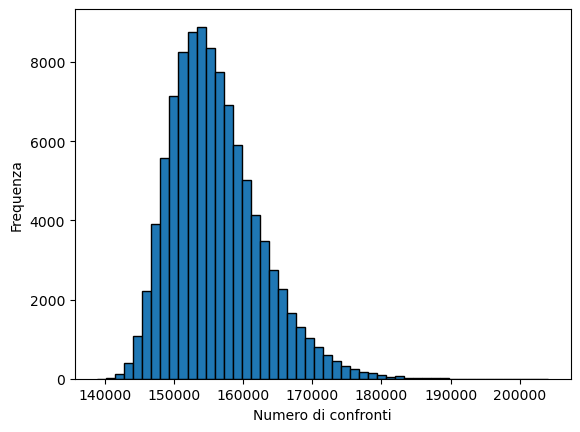

In [15]:
plt.hist(Xr, edgecolor="black", bins=50)
plt.xlabel("Numero di confronti")
plt.ylabel("Frequenza")
plt.show()

In [16]:
v1 = 2
v2 = 3

In [17]:
def markov(mu, k):
  return mu/(k*mu)

In [18]:
print(markov(val_medio, v1))
print(markov(val_medio, v2))

0.5
0.3333333333333333


In [19]:
def chebyshev(mu, k, varianza):
    return varianza / (((k-1)**2)*(mu**2))

In [20]:
print(chebyshev(val_medio, v1, varianza))
print(chebyshev(val_medio, v2, varianza))

0.0017075038067423183
0.0004268759516855796
